In [4]:
import pandas as pd

#Read Excel file and get insight
df12 = pd.read_excel('COOP4230_DS_PROJECT_DATA_12.xlsx', engine='openpyxl')
df12.head(5)

,PeriodOrder,CustomerId,ValueBasedSegment,ProfitSegment,YearlyIncome,AvgUsdAumL3M,AvgUsdAumL6M,SumUsdAum,MaxUsdAumL24M,AvgDemandDepositTrxUsdAmountL6M,...,AvgBranchTrxNumL6M,SumBranchTrxNumLM,SumCcIvrTrxNumL3M,SumCcIvrTrxNumL6M,SumDemandDepositTrxNumL3M,SumDemandDepositTrxNumL6M,BonusCampaignPromiseFlag,ClosedCreditCardFlag,ValidationFlag,ChurnFlag
0,12,6B93AE32-CC94-4225-93A6-4B4E4FE3ED38,X,D,0.0,0,0,0.0,50.0,0,...,0.28,NaN,0,0,0.0,0.0,0,0,0,0.0
1,12,23F308B0-0A29-4FC7-A4BB-FFAB461643EC,X,D,150.0,340,310,400.0,750.0,1370,...,0,NaN,0,0,2.0,2.0,0,0,0,0.0
2,12,14C523CD-12D8-435B-8BB3-10DB40C3EAA1,X,D,10.0,10,10,0.0,140.0,1040,...,0.55,NaN,0,0,4.0,8.0,0,0,0,0.0
3,12,35B56EC7-903C-473A-883A-75CDD5F3F0B0,X,C,770.0,0,0,0.0,790.0,340,...,0,NaN,0,0,6.0,6.0,0,0,0,0.0
4,12,3A7D8BB6-5D84-4401-AF57-5BD58DFC1868,X,B,850.0,0,0,0.0,0.0,150,...,0,NaN,0,0,6.0,6.0,0,0,0,0.0


In [5]:
#Check corralation
corr = df12.corr()
print(corr["ChurnFlag"].sort_values(ascending=False))

#Check NaN values from dataset
df12.isna().sum().sort_values(ascending=False)

ChurnFlag                           1.000000
ClosedCreditCardFlag                0.044777
ClosedPayrollDurationMonthL12M      0.033267
SumCreditCardRevolveUsdAmountLM     0.006337
SumTrDemandDepositTrxUsdAmountLM   -0.001559
                                      ...   
SumDemandDepositTrxTypeNumLM       -0.165948
Channel2OwnershipFlag              -0.177788
ActiveProductAndChannelGroupNum    -0.228249
PeriodOrder                              NaN
ValidationFlag                           NaN
Name: ChurnFlag, Length: 64, dtype: float64


SumClosedAutoBillPaymentOrderNumLM    65999
SumNewAutoBillPaymentOrderNumLM       65536
SumInboundTrxNumLM                    65278
SumFxDemandDepositTrxUsdAmountLM      64210
SumInboundNumLM                       62269
                                      ...  
Product6OwnershipFlag                     0
Product7OwnershipFlag                     0
Product8OwnershipFlag                     0
Product9OwnershipFlag                     0
PeriodOrder                               0
Length: 84, dtype: int64

In [6]:
#Select rows where ValidationFlag=0
dfmodel = df12.loc[df12['ValidationFlag'] == 0]

#Null values for ValidationFlag=0 rows
dfmodel.isna().sum().sort_values(ascending=False)

SumClosedAutoBillPaymentOrderNumLM    54999
SumNewAutoBillPaymentOrderNumLM       54608
SumInboundTrxNumLM                    54388
SumFxDemandDepositTrxUsdAmountLM      53496
SumInboundNumLM                       51881
                                      ...  
Product6OwnershipFlag                     0
Product7OwnershipFlag                     0
Product8OwnershipFlag                     0
Product9OwnershipFlag                     0
PeriodOrder                               0
Length: 84, dtype: int64

In [7]:
nullIncomes = dfmodel.loc[dfmodel['YearlyIncome'].isna()]
nullIncomes

dfmodel = dfmodel[dfmodel['YearlyIncome'].notna()]
dfmodel.isna().sum().sort_values(ascending=False)

SumClosedAutoBillPaymentOrderNumLM    54970
SumNewAutoBillPaymentOrderNumLM       54579
SumInboundTrxNumLM                    54359
SumFxDemandDepositTrxUsdAmountLM      53467
SumInboundNumLM                       51852
                                      ...  
Product6OwnershipFlag                     0
Product7OwnershipFlag                     0
Product8OwnershipFlag                     0
Product9OwnershipFlag                     0
PeriodOrder                               0
Length: 84, dtype: int64

## Dfmodel Refactored 

Unnecessary columns with a high number of null values were dropped.

In [8]:
dfmodel = dfmodel.drop(["SumClosedAutoBillPaymentOrderNumLM",
"SumNewAutoBillPaymentOrderNumLM",
"SumInboundTrxNumLM",               
"SumFxDemandDepositTrxUsdAmountLM",              
"SumInboundNumLM",             
"SumAutoBillPaymentNumLM",
"SumBranchTrxUsdAmountLM",                       
"SumBranchTrxNumLM",                      
"SumIncomingEftNumLM",                     
"SumEftNumLM",                    
"SumInstallmentLoanInstallmentBalanceLM",
"SumInstallmentLoanOpeningBalanceUsdLM",
"SumInstallmentLoanCurrentBalanceUsdLM",
"MaxOverdraftBalanceUsdLM",         
"AvgEftNumL3M",        
"AvgCreditCardEftUsdAmountL3M",       
"AvgEftNumL6M",      
"AvgCreditCardEftUsdAmountL6M",     
"CreditCardUsdLimitLM",    
"SumCreditCardRevolveUsdAmountLM",   
"SumCreditCardTrxNumLM",  
"SumCreditCardTrxUsdAmountLM", 
"SumAtmTrxUsdAmountLM",
"SumTrDemandDepositTrxUsdAmountLM"], axis=1)


### Null Values after unnecessary columns dropped

In [9]:
dfmodel.isna().sum().sort_values(ascending=False).head(5)

SumDemandDepositTrxNumL6M    3479
SumDemandDepositTrxNumL3M    2935
SumUsdAum                      27
SumLoanBalanceUsdLM            27
MaxLoanBalanceL24M             18
dtype: int64

### Correlation Values for ChurnFlag after unnecessary columns dropped 

In [10]:
corr = dfmodel.corr()
corr
corr["ChurnFlag"].sort_values(ascending=False).head(5)

ChurnFlag                          1.000000
ClosedCreditCardFlag               0.044587
ClosedPayrollDurationMonthL12M     0.033348
AvgDemandDepositTrxUsdAmountL6M   -0.001728
MaxUsdAumL24M                     -0.007035
Name: ChurnFlag, dtype: float64


## NaN counts 
27
SumUsdAum                                        
27
SumLoanBalanceUsdLM                              
18
MaxLoanBalanceL24M                               
18
MaxUsdAumL24M                                    


These rows dropped

In [11]:
nullIncomes = dfmodel.loc[dfmodel['SumUsdAum'].isna()] #Son 24 aydaki tüm varlıkların usd toplamı vadeli vadesiz
nullIncomes

#Current shape of dataframe
print('Current shape of dataframe' , dfmodel.shape)

#Shape of dataframe after drop operation
dfmodel = dfmodel.drop(index= nullIncomes.index, axis= 0)
print('Shape of dataframe after drop operation' , dfmodel.shape)

Current shape of dataframe (54971, 60)
Shape of dataframe after drop operation (54944, 60)


### Null Values after unnecessary rows dropped

In [12]:
dfmodel.isna().sum().sort_values(ascending=False).head(5)

SumDemandDepositTrxNumL6M    3479
SumDemandDepositTrxNumL3M    2935
ChurnFlag                       0
AvgInternetLoginNumL3M          0
ClosedProductNumL3M             0
dtype: int64

In [13]:
corr["SumDemandDepositTrxNumL3M"].sort_values(ascending=False).head(5)

SumDemandDepositTrxNumL3M          1.000000
SumDemandDepositTrxNumL6M          0.929089
SumDemandDepositTrxTypeNumLM       0.856933
ActiveProductAndChannelGroupNum    0.630240
Product13OwnershipFlag             0.564592
Name: SumDemandDepositTrxNumL3M, dtype: float64

SumDemandDepositTrxNumL3M - 2935 and SumDemandDepositTrxNumL6M - 3479 have null values
We created new dataset with dropping nulls for linear regression model

In [14]:
dfSumDemandDepositTrxNumL3M = dfmodel.loc[dfmodel['SumDemandDepositTrxNumL3M'] == 0]
nullIncomes = dfmodel.loc[dfmodel['SumDemandDepositTrxNumL3M'].isna()]

In [15]:
nullIncomes2 = dfmodel.loc[dfmodel['SumDemandDepositTrxNumL6M'].isna()] #validation dataset
print('Shape of current dfmodel' , dfmodel.shape)

testDataframe = dfmodel.drop(index= nullIncomes2.index, axis= 0)
nullIncomes3 = testDataframe.loc[dfmodel['SumDemandDepositTrxNumL3M'].isna()]
testDataframe = testDataframe.drop(index= nullIncomes3.index, axis= 0)
print('Shape of testdataframe' , testDataframe.shape)

Shape of current dfmodel (54944, 60)
Shape of testdataframe (50872, 60)


In [16]:
testDataframe.isna().sum().sort_values(ascending=False).head(5)

ChurnFlag                        0
ValidationFlag                   0
Product1OwnershipFlag            0
ClosedProductNumL3M              0
NewOpenProductAndChannelNumLM    0
dtype: int64

## Regression for imputation SumDemandDepositTrxNumL6M'

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

values = testDataframe[['SumDemandDepositTrxNumL3M','SumDemandDepositTrxTypeNumLM' ]]
scaler = StandardScaler()
scaled = scaler.fit_transform(values)
inputs = pd.DataFrame(scaled)

target = testDataframe['SumDemandDepositTrxNumL6M']
target = target.to_numpy()
target = target.reshape(-1, 1)
print('real target')
print(target)
minxmaxScaler = MinMaxScaler()
newtarget = minxmaxScaler.fit_transform(target)
target = pd.DataFrame(newtarget)
print(target)


X_train, X_test, y_train, y_test = train_test_split( inputs, target, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Test set
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#Real test
reversed_target2 = minxmaxScaler.inverse_transform(y_test)
print(reversed_target2)
reversed_target = minxmaxScaler.inverse_transform(y_pred)
print(reversed_target)

print('Mean Absolute Error:', metrics.mean_absolute_error(reversed_target2, reversed_target))
print('Mean Squared Error:', metrics.mean_squared_error(reversed_target2, reversed_target))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(reversed_target2, reversed_target)))

real target
[[0.]
 [2.]
 [8.]
 ...
 [4.]
 [4.]
 [2.]]
              0
0      0.000000
1      0.052632
2      0.210526
3      0.157895
4      0.157895
...         ...
50867  0.210526
50868  0.000000
50869  0.105263
50870  0.105263
50871  0.052632

[50872 rows x 1 columns]
Mean Absolute Error: 0.03654931137324324
Mean Squared Error: 0.0022705003937485576
Root Mean Squared Error: 0.047649768034572396
[[10.]
 [20.]
 [ 4.]
 ...
 [ 4.]
 [ 4.]
 [12.]]
[[ 9.26705557]
 [20.00865201]
 [ 5.09808145]
 ...
 [ 5.15611075]
 [ 5.15611075]
 [ 9.32508487]]
Mean Absolute Error: 1.3888738321832432
Mean Squared Error: 3.2786025685729183
Root Mean Squared Error: 1.8106911853137515


In [18]:
corr = testDataframe.corr()
corr["ChurnFlag"].sort_values(ascending=False).head(10)

ChurnFlag                            1.000000
ClosedCreditCardFlag                 0.040596
ClosedPayrollDurationMonthL12M       0.036551
AvgDemandDepositTrxUsdAmountL6M     -0.001801
ClosedOverdraftDurationMonthL12M    -0.005343
SumUsdAum                           -0.007413
MaxUsdAumL24M                       -0.007453
AvgFxDemandDepositTrxUsdAmountL6M   -0.007456
AvgFxDemandDepositTrxUsdAmountL3M   -0.007468
AvgUsdAumL3M                        -0.008408
Name: ChurnFlag, dtype: float64

In [19]:
sorted_data = testDataframe.reindex(sorted(testDataframe.columns), axis=1)
sorted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50872 entries, 0 to 65998
Data columns (total 60 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ActiveProductAndChannelGroupNum              50872 non-null  int64  
 1   AvgAtmTrxNumL6M                              50872 non-null  object 
 2   AvgAutoBillPaymentNumLM6                     50872 non-null  object 
 3   AvgBranchTrxNumL6M                           50872 non-null  object 
 4   AvgDemandDepositTrxNumL6M                    50872 non-null  object 
 5   AvgDemandDepositTrxUsdAmountL6M              50872 non-null  int64  
 6   AvgFxDemandDepositTrxNumL3M                  50872 non-null  object 
 7   AvgFxDemandDepositTrxNumL6M                  50872 non-null  object 
 8   AvgFxDemandDepositTrxUsdAmountL3M            50872 non-null  int64  
 9   AvgFxDemandDepositTrxUsdAmountL6M            50872 non-null  int64  
 10

### TotalProductOwnership creation Phase

In [20]:
##Total product ownership calculation
poColumns = sorted_data.iloc[:, 34:49]

In [21]:
poColumns.head(10)

,Product10OwnershipFlag,Product11OwnershipFlag,Product12OwnershipFlag,Product13OwnershipFlag,Product14OwnershipFlag,Product15OwnershipFlag,Product1OwnershipFlag,Product2OwnershipFlag,Product3OwnershipFlag,Product4OwnershipFlag,Product5OwnershipFlag,Product6OwnershipFlag,Product7OwnershipFlag,Product8OwnershipFlag,Product9OwnershipFlag
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,2,1,0,0,0,0,2,0,2,0,0
2,0,0,0,1,2,0,0,0,0,0,0,0,1,1,0
3,0,0,0,2,2,2,2,0,0,2,2,0,1,2,0
4,0,0,0,2,0,2,0,0,0,0,0,0,1,0,0
5,0,0,0,1,2,1,0,0,0,0,0,0,2,0,0
6,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0
7,0,0,0,1,1,1,0,0,0,0,2,0,2,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
10,0,0,0,0,2,2,2,0,0,0,2,0,2,0,0


In [22]:
totalProductOwnership = poColumns.T[poColumns.T > 0].count()

In [23]:
print(totalProductOwnership)

0        2
1        5
2        4
3        8
4        3
        ..
65994    5
65995    2
65996    4
65997    4
65998    2
Length: 50872, dtype: int64


In [24]:
sorted_data['TotalProductOwnership'] = totalProductOwnership

In [25]:
print(sorted_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50872 entries, 0 to 65998
Data columns (total 61 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ActiveProductAndChannelGroupNum              50872 non-null  int64  
 1   AvgAtmTrxNumL6M                              50872 non-null  object 
 2   AvgAutoBillPaymentNumLM6                     50872 non-null  object 
 3   AvgBranchTrxNumL6M                           50872 non-null  object 
 4   AvgDemandDepositTrxNumL6M                    50872 non-null  object 
 5   AvgDemandDepositTrxUsdAmountL6M              50872 non-null  int64  
 6   AvgFxDemandDepositTrxNumL3M                  50872 non-null  object 
 7   AvgFxDemandDepositTrxNumL6M                  50872 non-null  object 
 8   AvgFxDemandDepositTrxUsdAmountL3M            50872 non-null  int64  
 9   AvgFxDemandDepositTrxUsdAmountL6M            50872 non-null  int64  
 10

In [26]:
sorted_data = sorted_data.drop(poColumns, axis=1)
print(sorted_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50872 entries, 0 to 65998
Data columns (total 46 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ActiveProductAndChannelGroupNum              50872 non-null  int64  
 1   AvgAtmTrxNumL6M                              50872 non-null  object 
 2   AvgAutoBillPaymentNumLM6                     50872 non-null  object 
 3   AvgBranchTrxNumL6M                           50872 non-null  object 
 4   AvgDemandDepositTrxNumL6M                    50872 non-null  object 
 5   AvgDemandDepositTrxUsdAmountL6M              50872 non-null  int64  
 6   AvgFxDemandDepositTrxNumL3M                  50872 non-null  object 
 7   AvgFxDemandDepositTrxNumL6M                  50872 non-null  object 
 8   AvgFxDemandDepositTrxUsdAmountL3M            50872 non-null  int64  
 9   AvgFxDemandDepositTrxUsdAmountL6M            50872 non-null  int64  
 10

In [27]:
sorted_data['TotalProductOwnership']

0        2
1        5
2        4
3        8
4        3
        ..
65994    5
65995    2
65996    4
65997    4
65998    2
Name: TotalProductOwnership, Length: 50872, dtype: int64

#### Cheked ChurnFlag correlation after creation of TotalProductOwnership column

In [28]:
corr = sorted_data.corr()
corr["ChurnFlag"].sort_values(ascending=False)

ChurnFlag                                      1.000000
ClosedCreditCardFlag                           0.040596
ClosedPayrollDurationMonthL12M                 0.036551
AvgDemandDepositTrxUsdAmountL6M               -0.001801
ClosedOverdraftDurationMonthL12M              -0.005343
SumUsdAum                                     -0.007413
MaxUsdAumL24M                                 -0.007453
AvgFxDemandDepositTrxUsdAmountL6M             -0.007456
AvgFxDemandDepositTrxUsdAmountL3M             -0.007468
AvgUsdAumL3M                                  -0.008408
AvgUsdAumL6M                                  -0.009405
YearlyIncome                                  -0.010426
ClosedCreditCardDurationMonthL12M             -0.016579
BonusCampaignPromiseFlag                      -0.021875
SumCcIvrTrxNumL3M                             -0.023013
SumCcIvrTrxNumL6M                             -0.024318
Channel1OwnershipFlag                         -0.025774
NewOpenProductAndChannelNumLM                 -0

In [29]:
sorted_data['AvgAtmTrxNumL6M'].head(5)

0                      0
1    1957-10-01 00:00:00
2                  19.49
3    2021-04-06 00:00:00
4    1957-10-01 00:00:00
Name: AvgAtmTrxNumL6M, dtype: object

#### Columns where type='object' and includes dates found.
Parsed and prepared invalid data

In [30]:
def check_date_for_column(column, sorted_data):
    try:
        if column in sorted_data:
            if sorted_data[column].dtypes == 'object':
                for index, row in sorted_data[column].iteritems():   
                    if len(str(row)) == 19:
                        date = parse(str(row))
        return
    except Exception as e:
        return

for col in sorted_data.columns:
    check_date_for_column(col, sorted_data)

#### Invalid date rows fixed with transform_method for detected columns

In [31]:
from dateutil.parser import parse

def transform_method(column, sorted_data):
    print(column , 'started to process')
    if column in sorted_data:
        for index, row in sorted_data[column].iteritems():     
            if len(str(row)) > 12:
                date = parse(str(row))
                if date.year == 2021:
                    row = float(str(date.day) + '.' + str(date.month))
                    sorted_data.at[index,column]= row
                else:
                    row = float(str(date.month) + '.' + str(date.year)[-2:])
                    sorted_data.at[index,column]= row
    return

liste = ['AvgBranchTrxNumL6M',
'SumNewAutoBillPaymentOrderNumLM',
'SumAutoBillPaymentNumLM',
'AvgAutoBillPaymentNumLM6',
'DemandDepositBalanceDebtRatioLM6',
'AvgAtmTrxNumL6M',
'AvgFxDemandDepositTrxNumL6M',
'AvgFxDemandDepositTrxNumL3M',
'AvgDemandDepositTrxNumL6M',
'AvgInternetTrxNumL6M',
'AvgInternetTrxNumL3M',
'AvgInternetLoginNumL3M',
'AvgEftNumL6M',
'AvgEftNumL3M',
'ClosedProductNumL3M',
'DifDayLast2FinancialTrxL12M',
]


for item in liste:
    transform_method(item, sorted_data)

AvgBranchTrxNumL6M started to process
SumNewAutoBillPaymentOrderNumLM started to process
SumAutoBillPaymentNumLM started to process
AvgAutoBillPaymentNumLM6 started to process
DemandDepositBalanceDebtRatioLM6 started to process
AvgAtmTrxNumL6M started to process
AvgFxDemandDepositTrxNumL6M started to process
AvgFxDemandDepositTrxNumL3M started to process
AvgDemandDepositTrxNumL6M started to process
AvgInternetTrxNumL6M started to process
AvgInternetTrxNumL3M started to process
AvgInternetLoginNumL3M started to process
AvgEftNumL6M started to process
AvgEftNumL3M started to process
ClosedProductNumL3M started to process
DifDayLast2FinancialTrxL12M started to process


## Logistic Regression model created for feature importance


In [32]:
# logistic regression for feature importance
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define the model
model = LogisticRegression()
print(sorted_data.shape)
# fit the model
y = sorted_data['ChurnFlag']
X = sorted_data.drop(['ChurnFlag'], axis=1)
X = sorted_data.drop(['CustomerId'], axis=1)

(50872, 46)


In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['ProfitSegment'] = le.fit_transform(X['ProfitSegment'])
X['ValueBasedSegment'] = le.fit_transform(X['ValueBasedSegment'])

In [34]:
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
print(importance)

[-1.35506189e-02 -5.58618855e-02 -2.20584586e-03 -1.34377299e-03
 -3.97136319e-02  1.22299356e-06 -2.89018274e-04 -2.21783565e-04
 -1.32148786e-05  1.48471347e-05 -1.13784252e-03 -5.03291854e-04
 -5.05729836e-04  7.88319162e-05  1.16492643e-05 -2.77724093e-04
 -4.08562505e-03 -6.17121761e-03 -3.34092493e-03  1.39547455e-03
  1.69316897e-03 -1.12712953e-03 -2.71869760e-04 -1.17188483e-03
  2.23751812e-03 -1.68676316e-04 -2.52950087e-02 -1.19420687e-03
 -8.05354636e-06 -5.17024733e-03 -1.50243633e-05 -1.14286731e-04
 -5.38039223e-02 -1.20976711e-02 -5.04334285e-04 -3.46331615e-04
 -1.75648802e-02 -2.06294749e-02 -1.39746568e-02 -2.11918559e-04
 -1.28778192e-04  0.00000000e+00 -8.80109073e-03 -6.56635303e-06
 -1.56860097e-02]


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### IncreaseCcIvrTrxNum Column created
We got difference of SumCcIvrTrxNumL6M and SumCcIvrTrxNumL3M columns to detect calls increased in 3 months or decreased

In [35]:
first3M = X['SumCcIvrTrxNumL6M'].sub(X['SumCcIvrTrxNumL3M'], axis = 0)
first3M.to_numpy()
indices_increased = first3M > 0
indices_decreased = first3M <= 0
first3M[indices_increased] = 1 
first3M[indices_decreased] = 0
X['IncreaseCcIvrTrxNum'] = first3M
print(X['IncreaseCcIvrTrxNum'].head(5))

corr = X.corr()
corr["ChurnFlag"].sort_values(ascending=False)


0    0
1    0
2    0
3    0
4    0
Name: IncreaseCcIvrTrxNum, dtype: int64


ChurnFlag                                      1.000000
ProfitSegment                                  0.119418
ValueBasedSegment                              0.042577
ClosedCreditCardFlag                           0.040596
ClosedPayrollDurationMonthL12M                 0.036551
AvgDemandDepositTrxUsdAmountL6M               -0.001801
ClosedOverdraftDurationMonthL12M              -0.005343
SumUsdAum                                     -0.007413
MaxUsdAumL24M                                 -0.007453
AvgFxDemandDepositTrxUsdAmountL6M             -0.007456
AvgFxDemandDepositTrxUsdAmountL3M             -0.007468
AvgUsdAumL3M                                  -0.008408
AvgUsdAumL6M                                  -0.009405
YearlyIncome                                  -0.010426
ClosedCreditCardDurationMonthL12M             -0.016579
IncreaseCcIvrTrxNum                           -0.020672
BonusCampaignPromiseFlag                      -0.021875
SumCcIvrTrxNumL3M                             -0

In [36]:
sorted_data = X.reindex(sorted(X.columns), axis=1)
sorted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50872 entries, 0 to 65998
Data columns (total 46 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ActiveProductAndChannelGroupNum              50872 non-null  int64  
 1   AvgAtmTrxNumL6M                              50872 non-null  object 
 2   AvgAutoBillPaymentNumLM6                     50872 non-null  object 
 3   AvgBranchTrxNumL6M                           50872 non-null  object 
 4   AvgDemandDepositTrxNumL6M                    50872 non-null  object 
 5   AvgDemandDepositTrxUsdAmountL6M              50872 non-null  int64  
 6   AvgFxDemandDepositTrxNumL3M                  50872 non-null  object 
 7   AvgFxDemandDepositTrxNumL6M                  50872 non-null  object 
 8   AvgFxDemandDepositTrxUsdAmountL3M            50872 non-null  int64  
 9   AvgFxDemandDepositTrxUsdAmountL6M            50872 non-null  int64  
 10

### Insight for Channel1OwnershipFlag 	Channel2OwnershipFlag 	Channel3OwnershipFlag
Decided to create total active channel ownership with these columns.

In [37]:
channelcolumns = sorted_data.iloc[:, 16:19]

In [38]:
channelcolumns

,Channel1OwnershipFlag,Channel2OwnershipFlag,Channel3OwnershipFlag
0,1,0,1
1,0,2,1
2,2,2,1
3,1,2,1
4,0,2,0
...,...,...,...
65994,2,2,1
65995,0,0,0
65996,0,0,1
65997,2,2,1


In [39]:
totalActiveChannelOwnership = channelcolumns.T[channelcolumns.T > 1].count()
totalActiveChannelOwnership

0        0
1        1
2        2
3        1
4        1
        ..
65994    2
65995    0
65996    0
65997    2
65998    0
Length: 50872, dtype: int64

In [40]:
X['TotalActiveChannelOwnership'] = totalActiveChannelOwnership

In [41]:
corr = X.corr()
corr["ChurnFlag"].sort_values(ascending=False)
churn = X.loc[X['ChurnFlag'] == 1]
print(churn.shape)

(4756, 47)


## Logistic Regression model created for Churn Prediction

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np

target = X['ChurnFlag']
target = target.to_numpy()
target = target.reshape(-1, 1)

values = X.drop(['ChurnFlag'],axis=1)
scaler = StandardScaler()
scaled = scaler.fit_transform(values)
inputs = pd.DataFrame(scaled)


X_train, X_test, y_train, y_test = train_test_split( inputs, target, test_size=0.3, random_state=42)

regressor = LogisticRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(confusion_matrix(y_test, y_pred))


D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[13802    27]
 [ 1418    15]]


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.02033898305084746

In [44]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(13802, 27, 1418, 15)

#### Because of unbalanced ChurnFlag distribution we decided to remove some of Non-Churn rows for Machine Learning accuracy.

In [45]:
churnfalsefirst10k = X.loc[X['ChurnFlag'] == 0].loc[:20000,]
print(churnfalsefirst10k.shape)
churntrue = X.loc[X['ChurnFlag'] == 1]
print(churntrue.shape)


(14079, 47)
(4756, 47)


#### Balanced Dataframes merged

In [46]:
frames = [churnfalsefirst10k, churntrue]
result = pd.concat(frames)
print(result.shape)

(18835, 47)


### Logistic Regression for Churn Prediction After Balancing Dataset

In [47]:
target = result['ChurnFlag']
target = target.to_numpy()
target = target.reshape(-1, 1)

values = result.drop(['ChurnFlag'],axis=1)
scaler = StandardScaler()
scaled = scaler.fit_transform(values)
inputs = pd.DataFrame(scaled)

X_train, X_test, y_train, y_test = train_test_split( inputs, target, test_size=0.3, random_state=42)

regressor = LogisticRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(confusion_matrix(y_test, y_pred))
f1_score(y_test, y_pred)

[[3879  363]
 [ 885  524]]


D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.45644599303135885

## Random Forest Classifier Model for Churn Prediction

In [48]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

feature_imp = pd.Series(clf.feature_importances_,index=values.columns).sort_values(ascending=False)
feature_imp


<ipython-input-48-514d83c9b85f>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


SumUsdAum                                      0.084241
YearlyIncome                                   0.071951
ActiveProductAndChannelGroupNum                0.061541
AvgDemandDepositTrxUsdAmountL6M                0.052468
AvgDemandDepositTrxNumL6M                      0.052395
AvgAtmTrxNumL6M                                0.047711
DemandDepositBalanceDebtRatioLM6               0.047483
MaxUsdAumL24M                                  0.045549
MaxLoanBalanceL24M                             0.040434
TotalProductOwnership                          0.039594
AvgUsdAumL3M                                   0.038920
SumLoanBalanceUsdLM                            0.037201
SumDemandDepositTrxTypeNumLM                   0.036550
MaxLoanRemainingMaturity                       0.034690
AvgUsdAumL6M                                   0.034056
SumDemandDepositTrxNumL6M                      0.027324
Channel2OwnershipFlag                          0.026483
SumDemandDepositTrxNumL3M                      0

#### Random Forest Classification before hyperparameter tuning

In [49]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

<ipython-input-49-e927cbacf549>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Accuracy: 0.8396743939125818


In [50]:
print(confusion_matrix(y_test, y_pred))

[[3948  294]
 [ 612  797]]


In [51]:
f1_score(y_test, y_pred)

0.6376

#### Random Forest Classification after hyperparameter tuning

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [53]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.6min finished
D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [55]:
best_random = rf_random.best_estimator_
y_pred = best_random.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
f1score = f1_score(y_test, y_pred)

[[3943  299]
 [ 581  828]]
Accuracy: 0.8442753494956645


In [56]:
f1score

0.6529968454258674

Best optimal hyper parameters for RandomForestClassifier 

In [57]:
best_random

RandomForestClassifier(bootstrap=False, max_depth=110, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=600)

In [58]:
validation = df12.loc[df12['ValidationFlag'] == 1]
validation.shape

(11000, 84)

In [59]:
X['ValidationFlag']

0        0
1        0
2        0
3        0
4        0
        ..
65994    0
65995    0
65996    0
65997    0
65998    0
Name: ValidationFlag, Length: 50872, dtype: int64

In [60]:
corr = result.corr()
corr["ChurnFlag"].sort_values(ascending=False)

ChurnFlag                                      1.000000
ProfitSegment                                  0.184213
ValueBasedSegment                              0.069699
ClosedCreditCardFlag                           0.052414
ClosedPayrollDurationMonthL12M                 0.046833
AvgFxDemandDepositTrxUsdAmountL6M             -0.011822
AvgFxDemandDepositTrxUsdAmountL3M             -0.013123
ClosedOverdraftDurationMonthL12M              -0.013202
AvgDemandDepositTrxUsdAmountL6M               -0.019521
ClosedCreditCardDurationMonthL12M             -0.022941
AvgUsdAumL6M                                  -0.034277
IncreaseCcIvrTrxNum                           -0.035174
AvgUsdAumL3M                                  -0.035769
SumCcIvrTrxNumL3M                             -0.036244
BonusCampaignPromiseFlag                      -0.037134
SumCcIvrTrxNumL6M                             -0.039427
SumUsdAum                                     -0.039567
Channel1OwnershipFlag                         -0

In [63]:
result["ActiveProductAndChannelGroupNum"].head(10)

0     1
1     4
2     2
3     6
4     3
5     3
6     2
7     2
8     1
10    7
Name: ActiveProductAndChannelGroupNum, dtype: int64

<AxesSubplot:xlabel='ChurnFlag'>

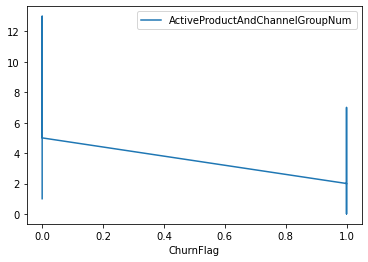

In [72]:
result.plot(x="ChurnFlag", y="ActiveProductAndChannelGroupNum")

<AxesSubplot:xlabel='TotalProductOwnership', ylabel='ChurnFlag'>

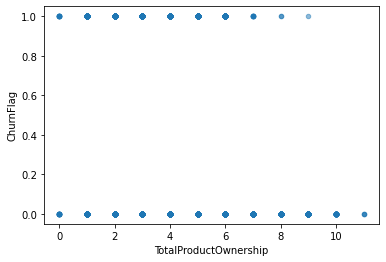

In [83]:
result.plot(kind='scatter', x="TotalProductOwnership", y="ChurnFlag", alpha=0.5)

array([[<AxesSubplot:title={'center':'TotalProductOwnership'}>,
        <AxesSubplot:title={'center':'ChurnFlag'}>]], dtype=object)

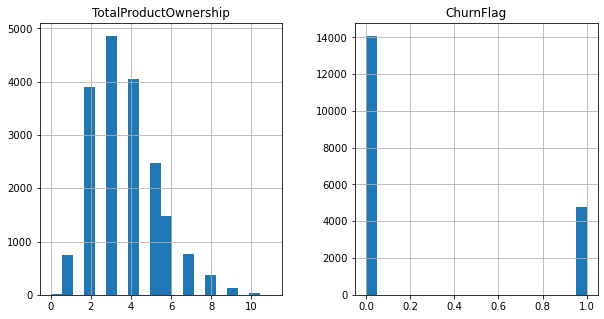

In [88]:
histog = result[['TotalProductOwnership',"ChurnFlag" ]]
histog.hist(bins=20, figsize=(10,5)) 

In [90]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7346938775510204

In [120]:
validation = df12.loc[df12['ValidationFlag'] == 1]

In [121]:
validation

,PeriodOrder,CustomerId,ValueBasedSegment,ProfitSegment,YearlyIncome,AvgUsdAumL3M,AvgUsdAumL6M,SumUsdAum,MaxUsdAumL24M,AvgDemandDepositTrxUsdAmountL6M,...,AvgBranchTrxNumL6M,SumBranchTrxNumLM,SumCcIvrTrxNumL3M,SumCcIvrTrxNumL6M,SumDemandDepositTrxNumL3M,SumDemandDepositTrxNumL6M,BonusCampaignPromiseFlag,ClosedCreditCardFlag,ValidationFlag,ChurnFlag
9,12,4238A086-DE09-441A-BBFC-579AAED7B561,X,D,90.0,0,0,0.0,40.0,800,...,0.28,NaN,2,2,10.0,16.0,0,0,1,NaN
14,12,B3EA8D2A-21BA-4083-8D27-B638B5B70954,B,A,19290.0,45430,38200,48880.0,48880.0,15570,...,0,NaN,0,0,12.0,14.0,0,0,1,NaN
15,12,0A98487E-6C9D-4C32-8C86-19A5A8C52F10,X,D,20.0,10,10,10.0,60.0,0,...,0,NaN,0,0,6.0,8.0,1,0,1,NaN
17,12,CFCBF9B9-E90F-4128-B864-8BDDA916F30E,X,B,1400.0,0,10,0.0,1440.0,2520,...,0,NaN,0,0,10.0,NaN,0,0,1,NaN
22,12,1B33EA37-15E9-4AD3-90C3-2210F4BF665B,X,C,660.0,0,0,0.0,10.0,220,...,0.28,NaN,0,0,6.0,8.0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65971,12,931EB5B4-C789-4205-ACAC-B9D43E81AC94,B,C,2760.0,0,0,0.0,460.0,5010,...,0,NaN,2,0,10.0,10.0,0,0,1,NaN
65975,12,9CBAF41F-65C4-465C-A674-11E8B148B819,X,B,880.0,0,0,0.0,0.0,0,...,0,NaN,0,0,6.0,6.0,0,0,1,NaN
65985,12,589DC6C8-EBF9-4C70-B758-E0CA4D1DCBD4,X,B,490.0,20,30,0.0,50.0,1400,...,0,NaN,0,0,0.0,0.0,0,0,1,NaN
65993,12,A32C965C-990C-4E64-96CF-D03E5B2775F5,X,B,1320.0,10680,10460,10660.0,10820.0,2800,...,0.84,NaN,0,0,4.0,6.0,0,1,1,NaN


In [122]:
validation = validation.drop(['ChurnFlag'] , axis=1)
validation = validation.drop(["SumClosedAutoBillPaymentOrderNumLM",
"SumNewAutoBillPaymentOrderNumLM",
"SumInboundTrxNumLM"              ,               
"SumFxDemandDepositTrxUsdAmountLM" ,              
"SumInboundNumLM"                   ,             
"SumAutoBillPaymentNumLM",
"SumBranchTrxUsdAmountLM" ,                       
"SumBranchTrxNumLM"        ,                      
"SumIncomingEftNumLM"       ,                     
"SumEftNumLM"                ,                    
"SumInstallmentLoanInstallmentBalanceLM"         ,
"SumInstallmentLoanOpeningBalanceUsdLM"          ,
"SumInstallmentLoanCurrentBalanceUsdLM",
"MaxOverdraftBalanceUsdLM"              ,         
"AvgEftNumL3M"                           ,        
"AvgCreditCardEftUsdAmountL3M"            ,       
"AvgEftNumL6M"                             ,      
"AvgCreditCardEftUsdAmountL6M"              ,     
"CreditCardUsdLimitLM"                       ,    
"SumCreditCardRevolveUsdAmountLM"             ,   
"SumCreditCardTrxNumLM"                        ,  
"SumCreditCardTrxUsdAmountLM"                   , 
"SumAtmTrxUsdAmountLM"                           ,
"SumTrDemandDepositTrxUsdAmountLM"     ], axis=1)
nullIncomes = validation.loc[validation['SumLoanBalanceUsdLM'].isna()]
nullIncomes
validation = validation.drop(index= nullIncomes.index, axis= 0)
validation.isna().sum().sort_values(ascending=False).head(50)
nullIncomes = validation.loc[validation['YearlyIncome'].isna()]
validation = validation.drop(index= nullIncomes.index, axis= 0)
nullIncomes2 = validation.loc[validation['SumDemandDepositTrxNumL6M'].isna()] #validation dataset
print('Shape of current dfmodel' , validation.shape)
testDataframe = validation.drop(index= nullIncomes2.index, axis= 0)

nullIncomes3 = testDataframe.loc[validation['SumDemandDepositTrxNumL3M'].isna()]
testDataframe = testDataframe.drop(index= nullIncomes3.index, axis= 0)
print('Shape of testdataframe' , testDataframe.shape)

Shape of current dfmodel (10979, 59)
Shape of testdataframe (10135, 59)


In [123]:
validation = testDataframe
sorted_data = testDataframe.reindex(sorted(testDataframe.columns), axis=1)
poColumns = sorted_data.iloc[:, 34:48]
sorted_data['TotalProductOwnership'] = poColumns.T[poColumns.T > 0].count()
sorted_data = sorted_data.drop(poColumns, axis=1)
sorted_data.shape

(10135, 46)

In [124]:

le = preprocessing.LabelEncoder()
sorted_data['ProfitSegment'] = le.fit_transform(sorted_data['ProfitSegment'])
sorted_data['ValueBasedSegment'] = le.fit_transform(sorted_data['ValueBasedSegment'])

In [125]:
first3M = sorted_data['SumCcIvrTrxNumL6M'].sub(sorted_data['SumCcIvrTrxNumL3M'], axis = 0)
first3M.to_numpy()
indices_increased = first3M > 0
indices_decreased = first3M <= 0
first3M[indices_increased] = 1 
first3M[indices_decreased] = 0
sorted_data['IncreaseCcIvrTrxNum'] = first3M

In [126]:
sorted_data.shape

(10135, 47)

In [127]:
from dateutil.parser import parse

def transform_method(column, sorted_data):
    print(column , 'started to process')
    if column in sorted_data:
        for index, row in sorted_data[column].iteritems():     
            if len(str(row)) > 12:
                date = parse(str(row))
                if date.year == 2021:
                    row = float(str(date.day) + '.' + str(date.month))
                    sorted_data.at[index,column]= row
                else:
                    row = float(str(date.month) + '.' + str(date.year)[-2:])
                    sorted_data.at[index,column]= row
    return

liste = ['AvgBranchTrxNumL6M',
'SumNewAutoBillPaymentOrderNumLM',
'SumAutoBillPaymentNumLM',
'AvgAutoBillPaymentNumLM6',
'DemandDepositBalanceDebtRatioLM6',
'AvgAtmTrxNumL6M',
'AvgFxDemandDepositTrxNumL6M',
'AvgFxDemandDepositTrxNumL3M',
'AvgDemandDepositTrxNumL6M',
'AvgInternetTrxNumL6M',
'AvgInternetTrxNumL3M',
'AvgInternetLoginNumL3M',
'AvgEftNumL6M',
'AvgEftNumL3M',
'ClosedProductNumL3M',
'DifDayLast2FinancialTrxL12M',
]


for item in liste:
    transform_method(item, sorted_data)

AvgBranchTrxNumL6M started to process
SumNewAutoBillPaymentOrderNumLM started to process
SumAutoBillPaymentNumLM started to process
AvgAutoBillPaymentNumLM6 started to process
DemandDepositBalanceDebtRatioLM6 started to process
AvgAtmTrxNumL6M started to process
AvgFxDemandDepositTrxNumL6M started to process
AvgFxDemandDepositTrxNumL3M started to process
AvgDemandDepositTrxNumL6M started to process
AvgInternetTrxNumL6M started to process
AvgInternetTrxNumL3M started to process
AvgInternetLoginNumL3M started to process
AvgEftNumL6M started to process
AvgEftNumL3M started to process
ClosedProductNumL3M started to process
DifDayLast2FinancialTrxL12M started to process


In [128]:
sorted_data = sorted_data.drop(['CustomerId'], axis=1)

In [129]:
sorted_data.shape

(10135, 46)

In [147]:
scaler = StandardScaler()
scaled = scaler.fit_transform(sorted_data)
inputs = pd.DataFrame(scaled)
y_pred = best_random.predict(inputs)

In [149]:
y_pred.reshape(-1)

array([0., 0., 0., ..., 0., 0., 0.])

In [150]:
sorted_data['ChurnFlag'] = y_pred

In [153]:
sorted_data['ChurnFlag'] = sorted_data['ChurnFlag'].astype(int)

In [154]:
sorted_data

,ActiveProductAndChannelGroupNum,AvgAtmTrxNumL6M,AvgAutoBillPaymentNumLM6,AvgBranchTrxNumL6M,AvgDemandDepositTrxNumL6M,AvgDemandDepositTrxUsdAmountL6M,AvgFxDemandDepositTrxNumL3M,AvgFxDemandDepositTrxNumL6M,AvgFxDemandDepositTrxUsdAmountL3M,AvgFxDemandDepositTrxUsdAmountL6M,...,SumDemandDepositTrxNumL6M,SumDemandDepositTrxTypeNumLM,SumLoanBalanceUsdLM,SumUsdAum,ValidationFlag,ValueBasedSegment,YearlyIncome,TotalProductOwnership,IncreaseCcIvrTrxNum,ChurnFlag
9,4,16.15,1.12,0.28,6.4,800,0,0,0,0,...,16.0,4,590.0,0.0,1,2,90.0,4,0,0
14,5,33.12,0,0,25.33,15570,2.79,2.51,5370,5970,...,14.0,8,10.0,48880.0,1,1,19290.0,5,0,0
15,3,1.39,0,0,0,0,0,0,0,0,...,8.0,6,0.0,10.0,1,2,20.0,5,0,0
22,3,30.61,0,0.28,5.85,220,0,0,0,0,...,8.0,8,0.0,0.0,1,2,660.0,3,0,0
28,3,32.01,0,0,7.8,2940,0,0,0,0,...,0.0,0,0.0,110.0,1,2,-250.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65971,7,13.64,1.39,0,30.61,5010,0,0,0,0,...,10.0,8,2660.0,0.0,1,1,2760.0,7,0,0
65975,2,0,0,0,0,0,0,0,0,0,...,6.0,6,0.0,0.0,1,2,880.0,3,0,0
65985,6,12.53,0,0,6.96,1400,0,0,0,0,...,0.0,0,4810.0,0.0,1,2,490.0,7,0,0
65993,3,1.12,0,0.84,23.38,2800,6.13,5.85,11200,12420,...,6.0,4,0.0,10660.0,1,2,1320.0,5,0,0


In [156]:
sorted_data.to_csv('validation')